##Computer vision experiment no.2
###Swarnabh Gajbhiye
###Prn - 1032211392

In [1]:
import numpy as np
import skimage
from skimage.io import imread
from skimage import io
from skimage.feature import greycomatrix
from skimage.color import rgb2gray
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import data

In [2]:
coarse=cv2.imread('/content/coarse-sand-1608649.jpg')
image=rgb2gray(coarse)

smooth=cv2.imread('/content/your-normal-isnt-the-worlds-normal-wyanne.jpg')
image1=rgb2gray(smooth)

mixed=cv2.imread('/content/10137365-YGZTWVJJ-7.jpg')
image2=rgb2gray(mixed)



In [3]:
print(skimage.__version__)

0.19.3


In [4]:
co_matrix1=skimage.feature.greycomatrix(image.astype(int), [5], [0], levels=256, symmetric=True, normed=True)
co_matrix2=skimage.feature.greycomatrix(image1.astype(int), [5], [0], levels=256, symmetric=True, normed=True)
co_matrix3=skimage.feature.greycomatrix(image2.astype(int), [5], [0], levels=256, symmetric=True, normed=True)

#Calculate texture features from the co-occurence matrix
contrast1=skimage.feature.greycoprops(co_matrix1, 'contrast') #features of coarse
correlation1=skimage.feature.greycoprops(co_matrix1, 'correlation')
energy1=skimage.feature.greycoprops(co_matrix1, 'energy')
homogeneity1=skimage.feature.greycoprops(co_matrix1, 'homogeneity')

contrast2=skimage.feature.greycoprops(co_matrix2, 'contrast') #features of smooth image
correlation2=skimage.feature.greycoprops(co_matrix2, 'correlation')
energy2=skimage.feature.greycoprops(co_matrix2, 'energy')
homogeneity2=skimage.feature.greycoprops(co_matrix2, 'homogeneity')

contrast3=skimage.feature.greycoprops(co_matrix3, 'contrast') #features of smooth image
correlation3=skimage.feature.greycoprops(co_matrix3, 'correlation')
energy3=skimage.feature.greycoprops(co_matrix3, 'energy')
homogeneity3=skimage.feature.greycoprops(co_matrix3, 'homogeneity')

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/sk

Contrast: [[0.]]
Correlation: [[1.]]
Energy: [[1.]]
Homogeneity: [[1.]]
Contrast: [[0.00040816]]
Correlation: [[0.08551016]]
Energy: [[0.99957275]]
Homogeneity: [[0.99979592]]
Contrast: [[0.00010865]]
Correlation: [[-5.43277115e-05]]
Energy: [[0.99989135]]
Homogeneity: [[0.99994568]]


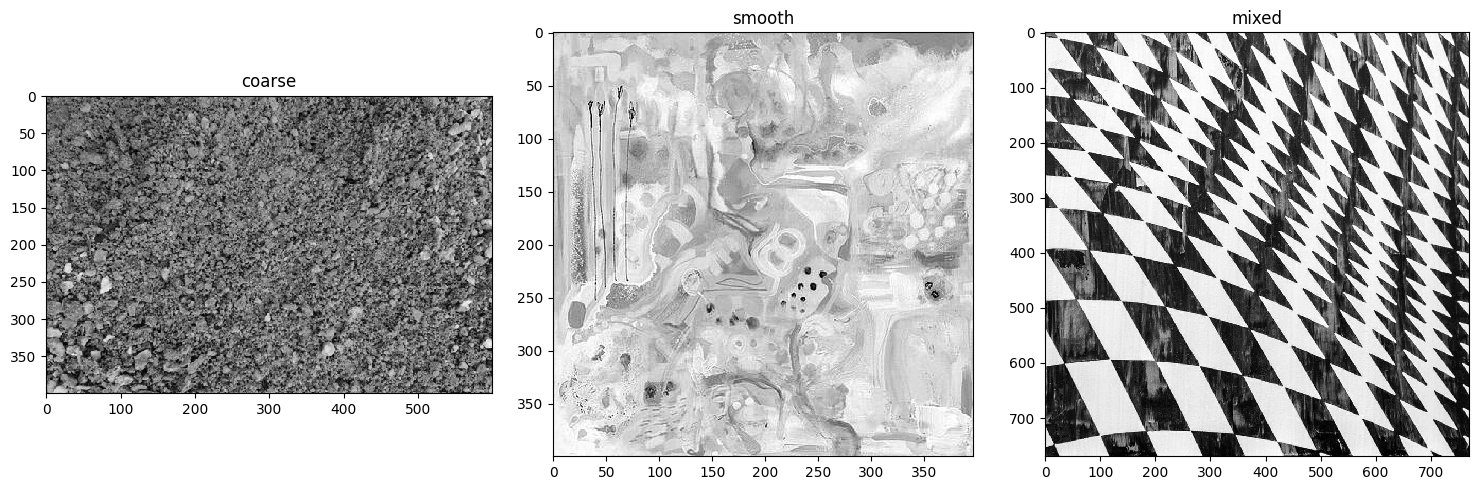

In [5]:
#print the texture features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
io.imshow(image, cmap='gray')
plt.title('coarse')
print("Contrast:", contrast1)
print("Correlation:", correlation1)
print("Energy:", energy1)
print("Homogeneity:", homogeneity1)


plt.subplot(1, 3, 2)
io.imshow(image1, cmap='gray')
plt.title('smooth')
print("Contrast:", contrast2)
print("Correlation:", correlation2)
print("Energy:", energy2)
print("Homogeneity:", homogeneity2)


plt.subplot(1, 3, 3)
io.imshow(image2, cmap='gray')
plt.title('mixed')
print("Contrast:", contrast3)
print("Correlation:", correlation3)
print("Energy:", energy3)
print("Homogeneity:", homogeneity3)

#PART B image segmentation, feature extraction

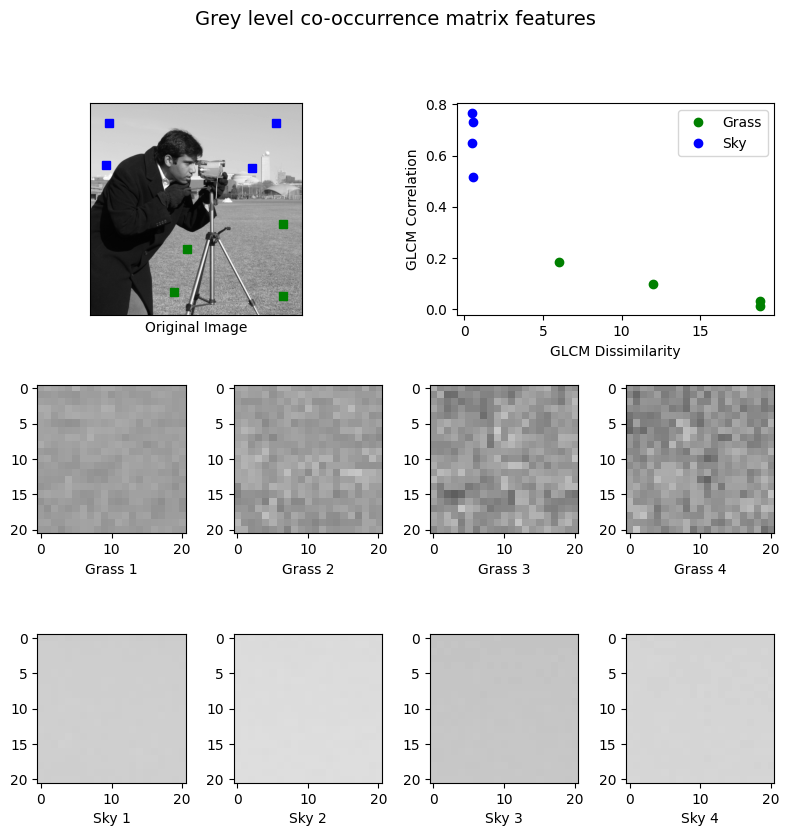

In [12]:
PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Grass {i + 1}")

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Sky {i + 1}")


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()